In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import re
import pickle 
import nltk
#import heapq
from sklearn.datasets import load_files
import csv
import matplotlib.pyplot as plt
import itertools
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn import metrics
stop_words = set(stopwords.words('english')) 
#from gensim.models import Word2Vec

In [2]:
Data=pd.read_excel('NewsData.xlsx')

X=Data.iloc[:,0].values
y=Data.iloc[:,1].values

corpus_sent = []
for i in range(0,len(X)):
    text = re.sub(r'\W',' ',str(X[i]))
    text = re.sub("@[\w\d]+", "", text)           #delete any references to other people
    text = re.sub("http:[\w\:\/\.]+","", text)    #replace url's
    text = re.sub('[^[A-Za-z]\s]','', text)      #replace non alphabets and non spaces
    text=  re.sub('[^a-zA-Z]',' ', text)         #remoce non words (special characters)
    text = re.sub('[^\w\s]','', text)            #remove white spaces
    text = text.lower()
    words = nltk.tokenize.word_tokenize(text)
    tokens =' '.join([word for word in words if not text in stop_words])
    corpus_sent.append(tokens)
    

lem = WordNetLemmatizer()

# word tokenization
for i in range(len(corpus_sent)):
    words = nltk.word_tokenize(corpus_sent[i])
    stm_word = [lem.lemmatize(word) for word in words]
    corpus_sent[i] = ' '.join(stm_word)


In [4]:
# Creating the BOW model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = None)
X = vectorizer.fit_transform(corpus_sent).toarray()

In [5]:
# Splitting the dataset into the Training set and Test set
y=y.astype('int')

from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [7]:
len(text_train)
#len(text_test)

2400

In [5]:
# Training the classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(text_train,sent_train)

# Testing model performance
lr_pred = classifier.predict(text_test)

c:\users\khair\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\khair\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
cm = confusion_matrix(sent_test, lr_pred)
print (cm)  


[[124  22]
 [ 18 436]]


In [40]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(sent_test,lr_pred)
lr_f1 = f1_score(sent_test,lr_pred)
lr_precision = precision_score(sent_test,lr_pred)
lr_recall = recall_score(sent_test,lr_pred)
print(lr_accuracy*100)
print(lr_f1*100)
print(lr_precision*100)
print(lr_recall*100)

93.33333333333333
95.6140350877193
95.19650655021834
96.0352422907489


In [11]:
#from sklearn.metrics import classification_report

#print(classification_report(sent_test, lr_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       146
           1       0.95      0.96      0.96       454

    accuracy                           0.93       600
   macro avg       0.91      0.90      0.91       600
weighted avg       0.93      0.93      0.93       600



In [16]:
#from sklearn.metrics import roc_curve
#import matplotlib.pyplot as plt
#%matplotlib inline

In [17]:
#fpr, tpr, thresholds = roc_curve(sent_test, lr_pred)

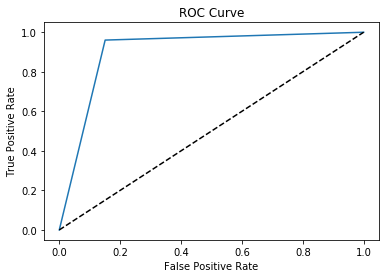

<Figure size 432x288 with 0 Axes>

In [18]:
'''fpr, tpr, thresholds = roc_curve(sent_test, lr_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# save figure
plt.savefig('roc_curve.png', dpi=200)'''

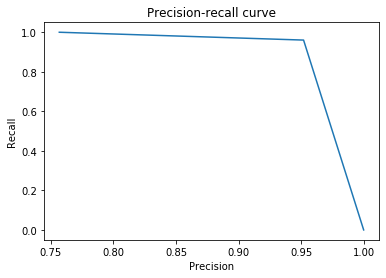

<Figure size 432x288 with 0 Axes>

In [24]:
'''from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(sent_test, lr_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.show()

# save figure
plt.savefig('precision_recall.png', dpi=200)'''

In [ ]:
#ac = roc.ac

In [19]:
# svm
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(text_train, sent_train)
# Testing model performance
svm_pred = clf_output.predict(text_test)

In [71]:
#cm = confusion_matrix(sent_test, svm_pred)
#print (cm) 

[[134  12]
 [ 35 419]]


In [41]:
svm_accuracy = accuracy_score(sent_test,svm_pred)
svm_f1 = f1_score(sent_test,svm_pred)
svm_precision = precision_score(sent_test,svm_pred)
svm_recall = recall_score(sent_test,svm_pred)
print(svm_accuracy*100)
print(svm_f1*100)
print(svm_precision*100)
print(svm_recall*100)

92.16666666666666
94.68926553672317
97.21577726218096
92.29074889867842


In [21]:
#print(classification_report(sent_test, svm_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       146
           1       0.97      0.92      0.95       454

    accuracy                           0.92       600
   macro avg       0.88      0.92      0.90       600
weighted avg       0.93      0.92      0.92       600



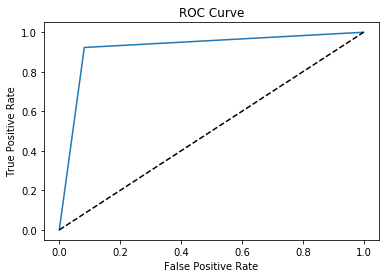

<Figure size 432x288 with 0 Axes>

In [22]:
'''fpr, tpr, thresholds = roc_curve(sent_test, svm_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# save figure
plt.savefig('roc_curve_svm.png', dpi=200)'''

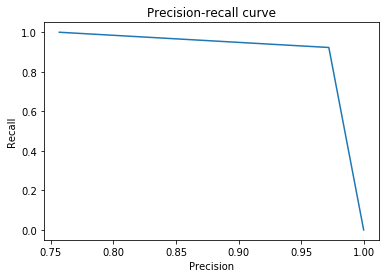

<Figure size 432x288 with 0 Axes>

In [25]:
'''precision, recall, thresholds = precision_recall_curve(sent_test, svm_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.show()

# save figure
plt.savefig('precision_recall_svm.png', dpi=200)'''

In [26]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb = nb.fit(text_train, sent_train)

nb_pred = nb.predict(text_test)

In [42]:
nb_accuracy = accuracy_score(sent_test,nb_pred)
nb_f1 = f1_score(sent_test,nb_pred)
nb_precision = precision_score(sent_test,nb_pred)
nb_recall = recall_score(sent_test,nb_pred)
print(nb_accuracy*100)
print(nb_f1*100)
print(nb_precision*100)
print(nb_recall*100)

87.16666666666667
91.41583054626533
92.55079006772009
90.30837004405286


In [28]:
#print(classification_report(sent_test, nb_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       146
           1       0.93      0.90      0.91       454

    accuracy                           0.87       600
   macro avg       0.82      0.84      0.83       600
weighted avg       0.88      0.87      0.87       600



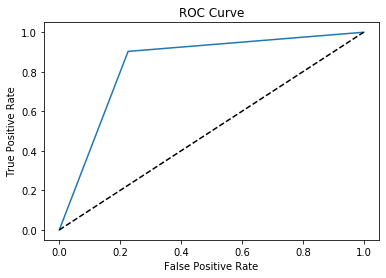

<Figure size 432x288 with 0 Axes>

In [29]:
'''fpr, tpr, thresholds = roc_curve(sent_test, nb_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# save figure
plt.savefig('roc_curve_svm.png', dpi=200)'''

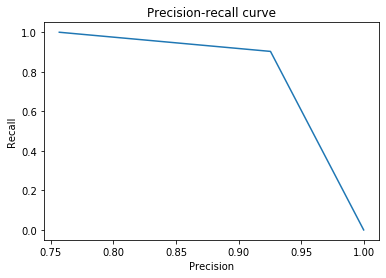

<Figure size 432x288 with 0 Axes>

In [30]:
'''precision, recall, thresholds = precision_recall_curve(sent_test, nb_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.show()

# save figure
plt.savefig('precision_recall_svm.png', dpi=200)'''

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#roc curve lr
fpr_lr, tpr_lr,thresholds_lr = roc_curve(sent_test, lr_pred)
#svm roc curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(sent_test, svm_pred)
#nb roc curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(sent_test, nb_pred)
#dt roc curve
#fpr_dt, tpr_dt, thresholds_dt = roc_curve(sent_test, dt_pred)

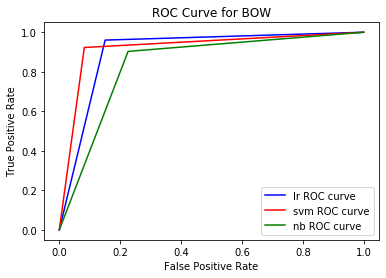

In [34]:
# create plot
plt.plot(fpr_lr, tpr_lr, label='lr ROC curve', c = 'b')
plt.plot(fpr_svm, tpr_svm, label='svm ROC curve', c = 'r')
plt.plot(fpr_nb, tpr_nb, label='nb ROC curve', c = 'g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BOW')
plt.legend(loc="lower right")

In [35]:
#precision recal curve lr
fpr_lr, tpr_lr,thresholds_lr = precision_recall_curve(sent_test, lr_pred)
#svm precision recal  curve
fpr_svm, tpr_svm, thresholds_svm = precision_recall_curve(sent_test, svm_pred)
#nb precision recal  curve
fpr_nb, tpr_nb, thresholds_nb = precision_recall_curve(sent_test, nb_pred)
#dt precision recal curve
#fpr_dt, tpr_dt, thresholds_dt = precision_recall_curve(sent_test, dt_pred)

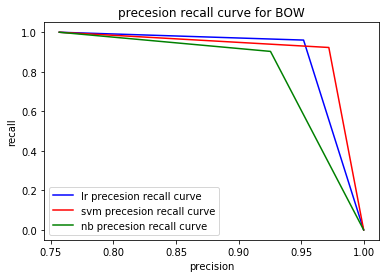

In [38]:
plt.plot(fpr_lr, tpr_lr, label='lr precesion recall curve', c = 'b')
plt.plot(fpr_svm, tpr_svm, label='svm precesion recall curve', c = 'r')
plt.plot(fpr_nb, tpr_nb, label='nb precesion recall curve', c = 'g')
#plt.plot(fpr_dt, tpr_dt, label='dt precesion recall curve', c = 'y')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precesion recall curve for BOW')
plt.legend(loc="lower left")

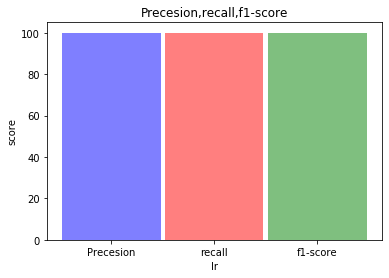

In [85]:
data = [lr_f1, lr_precision,lr_recall]
objects = "Precesion","recall","f1-score"
y_pos = 0,1,2
plt.figure(figsize=(6,4))
plt.bar(y_pos,100, data,color = ['b','r','g'] ,alpha = 0.5)
plt.xticks(y_pos, objects)
plt.xlabel('lr')
plt.ylabel('score')
plt.title('Precesion,recall,f1-score')
plt.show()

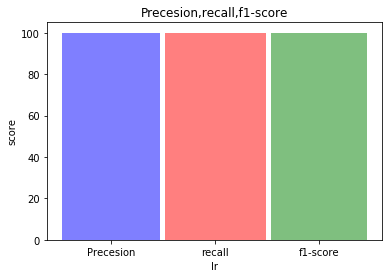

In [84]:
data = [svm_f1, svm_precision,svm_recall]
objects = "Precesion","recall","f1-score"
y_pos = 0,1,2
plt.figure(figsize=(6,4))
plt.bar(y_pos,100, data,color = ['b','r','g'] ,alpha = 0.5)
plt.xticks(y_pos, objects)
plt.xlabel('lr')
plt.ylabel('score')
plt.title('Precesion,recall,f1-score')
plt.show()

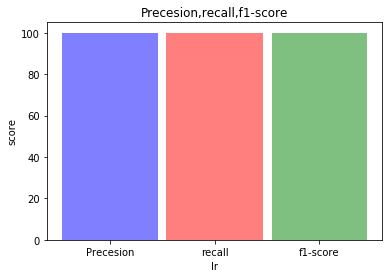

In [86]:
data = [nb_f1, nb_precision,nb_recall]
objects = "Precesion","recall","f1-score"
y_pos = 0,1,2
plt.figure(figsize=(6,4))
plt.bar(y_pos,100, data,color = ['b','r','g'] ,alpha = 0.5)
plt.xticks(y_pos, objects)
plt.xlabel('lr')
plt.ylabel('score')
plt.title('Precesion,recall,f1-score')
plt.show()

In [1]:
'''data = [[lr*100, lr_precision*100,lr_recall*100],[svm_f1*100, svm_precision*100,svm_recall*100],[nb_f1*100, nb_precision*100,nb_recall*100]]
objects = "LR","SVM","NB"
x = np.arange(3)
plt.figure(figsize=(4,2))
plt.bar(x + 0.00, data[0],color = 'b' ,label = 'F1')s
plt.bar(x + 0.25, data[1],color = 'g' ,  label = 'precision')
plt.bar(x + 0.5, data[2],color = 'r' , label = 'recall')
plt.xticks(x, objects)
plt.ylabel('score')
plt.title('Precesion,recall,f1-score')
plt.legend(fontsize = 12, loc= (1.05,0.4))
plt.show()'''

NameError: name 'lr_f1' is not defined

In [99]:
#data

[[0.956140350877193, 0.9519650655021834, 0.960352422907489],
 [0.9468926553672317, 0.9721577726218097, 0.9229074889867841],
 [0.9141583054626532, 0.9255079006772009, 0.9030837004405287]]